In [ ]:
import tweepy

from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import csv
import re #regular expressionfrom textblob import TextBlob
import string
import preprocessor as p

In [ ]:
# Variables that containts the credential 
ACCESS_TOKEN = '1181611364608962561-4ealKKsBimQJrMl2EyWykD1Y5BI3aJ'
ACCESS_SECRET = 'udDixp2A2S1tHl6dhEiRgQIrXZ09GrUI08SNCN4gOOKAC'
CONSUMER_KEY = 'X8QEeyDudNE95GN3rYLrBjvdR'
CONSUMER_SECRET = 'kiUXWnxAv6YHN7vOCeCiZACzItoeAnWci2DYkp8GawylvMgdIJ'

# Setup Access to API
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN,ACCESS_SECRET)
    
    api = tweepy.API(auth)
    return api

# Create PI project
api = connect_to_twitter_OAuth()

csvFile = open('coldplayproject.csv', 'a')
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search, q = "coldplay", count = 200,  show_user = True, lang = "en").items(10000):
  print(tweet.text, tweet.id, tweet.user.screen_name, tweet.created_at)
  csvWriter.writerow([tweet.text, tweet.id, tweet.user.screen_name, tweet.created_at])
csvFile.close()

I WILL go see Coldplay live. I W I L L 1187634471555584000 dalethedragon_ 2019-10-25 07:38:17
both new coldplay songs sound like white dorks trying to play cool african music from the 70s 1187634466321158151 EliBraden 2019-10-25 07:38:16
RT @tessastuber: @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛 1187634458360500224 ladyastorstatue 2019-10-25 07:38:14
I wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️ 1187634457085394945 SaraShaabanAli 2019-10-25 07:38:14
Now Playing Coldplay - Orphans @coldplay 1187634442782871552 BBCMcrMusicBot 2019-10-25 07:38:10
รัก coldplay 1187634432590503936 Torie76 2019-10-25 07:38:08
RT @Kvnmi: Guys!

So, Coldplay released 2 singles off the new album., One is "Arabesque".. 

Femi Kuti played the saxophone!!!
 
and at the… 1187634372926672896 CupofCoffee_xo 2019-10-25 07:37:54
Me Right Now #Coldplay https://t.co/2wCfwhugcw https://t.co/oS9ZQJ3tbh 1187634362457702401 cach1276 2019-10-25 07:37:51
OHHHHH SHEIẞ COLDPLAY RELEASED A

In [ ]:
cp = pd.read_csv('coldplayproject.csv', sep=',', names=["tweet", "id", "username", "created_at"])
cp.head()

,tweet,id,username,created_at
0,I WILL go see Coldplay live. I W I L L,1187634471555584000,dalethedragon_,2019-10-25 07:38:17
1,both new coldplay songs sound like white dorks...,1187634466321158151,EliBraden,2019-10-25 07:38:16
2,"RT @tessastuber: @coldplay Love, love, love! W...",1187634458360500224,ladyastorstatue,2019-10-25 07:38:14
3,I wanna share with the whole world coldplay's ...,1187634457085394945,SaraShaabanAli,2019-10-25 07:38:14
4,Now Playing Coldplay - Orphans @coldplay,1187634442782871552,BBCMcrMusicBot,2019-10-25 07:38:10


In [ ]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher 
from spacy.tokens import Span 
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm
pd.set_option('display.max_colwidth', 200)
%matplotlib inline

cp['Remove_retweets_add'] = cp['tweet'].apply(lambda x: re.compile('https://t.co/').sub('',x,count=1).strip())
cp

,tweet,id,username,created_at,tweet_string,Remove_retweets_add,remove_rt,remove_uname
0,I WILL go see Coldplay live. I W I L L,1187634471555584000,dalethedragon_,2019-10-25 07:38:17,I WILL go see Coldplay live. I W I L L,I WILL go see Coldplay live. I W I L L,I WILL go see Coldplay live. I W I L L,WILL go see Coldplay live. I W I L L
1,both new coldplay songs sound like white dorks trying to play cool african music from the 70s,1187634466321158151,EliBraden,2019-10-25 07:38:16,both new coldplay songs sound like white dorks trying to play cool african music from the 70s,both new coldplay songs sound like white dorks trying to play cool african music from the 70s,both new coldplay songs sound like white dorks trying to play cool african music from the 70s,new coldplay songs sound like white dorks trying to play cool african music from the 70s
2,"RT @tessastuber: @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛",1187634458360500224,ladyastorstatue,2019-10-25 07:38:14,"RT @tessastuber: @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛","RT @tessastuber: @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛","tessastuber: @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛",": @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛"
3,I wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️,1187634457085394945,SaraShaabanAli,2019-10-25 07:38:14,I wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️,I wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️,I wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️,wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️
4,Now Playing Coldplay - Orphans @coldplay,1187634442782871552,BBCMcrMusicBot,2019-10-25 07:38:10,Now Playing Coldplay - Orphans @coldplay,Now Playing Coldplay - Orphans @coldplay,Now Playing Coldplay - Orphans @coldplay,Playing Coldplay - Orphans @coldplay
...,...,...,...,...,...,...,...,...
9995,My neighbor put the new songs of @coldplay and that makes me very happy! Now I know he has good musical taste 🤭 🎷🎷🎷,1187495943937155076,maeeevy,2019-10-24 22:27:50,My neighbor put the new songs of @coldplay and that makes me very happy! Now I know he has good musical taste 🤭 🎷🎷🎷,My neighbor put the new songs of @coldplay and that makes me very happy! Now I know he has good musical taste 🤭 🎷🎷🎷,My neighbor put the new songs of @coldplay and that makes me very happy! Now I know he has good musical taste 🤭 🎷🎷🎷,neighbor put the new songs of @coldplay and that makes me very happy! Now I know he has good musical taste 🤭 🎷🎷🎷
9996,RT @coldplayxtra: And the GRAMMY goes to….\n\n|￣￣￣￣￣￣￣￣￣￣￣|\n COLDPLAY\n FOR ARABESQUE\n|＿＿＿＿＿＿＿＿＿＿＿| \n \ (•◡•) /…,1187495941261189123,iMuhammadali98,2019-10-24 22:27:49,RT @coldplayxtra: And the GRAMMY goes to….\n\n|￣￣￣￣￣￣￣￣￣￣￣|\n COLDPLAY\n FOR ARABESQUE\n|＿＿＿＿＿＿＿＿＿＿＿| \n \ (•◡•) /…,RT @coldplayxtra: And the GRAMMY goes to….\n\n|￣￣￣￣￣￣￣￣￣￣￣|\n COLDPLAY\n FOR ARABESQUE\n|＿＿＿＿＿＿＿＿＿＿＿| \n \ (•◡•) /…,coldplayxtra: And the GRAMMY goes to….\n\n|￣￣￣￣￣￣￣￣￣￣￣|\n COLDPLAY\n FOR ARABESQUE\n|＿＿＿＿＿＿＿＿＿＿＿| \n \ (•◡•) /…,: And the GRAMMY goes to….\n\n|￣￣￣￣￣￣￣￣￣￣￣|\n COLDPLAY\n FOR ARABESQUE\n|＿＿＿＿＿＿＿＿＿＿＿| \n \ (•◡•) /…
9997,RT @coldplayxtra: Coldplay have tagged two Instagram accounts that seem to reveal lyrics to the new songs 👀\n\n🌙☀️ #EverydayLife https://t.co…,1187495935141695490,Ffi_Rees98,2019-10-24 22:27:48,RT @coldplayxtra: Coldplay have tagged two Instagram accounts that seem to reveal lyrics to the new songs 👀\n\n🌙☀️ #EverydayLife https://t.co…,RT @coldplayxtra: Coldplay have tagged two Instagram accounts that seem to reveal lyrics to the new songs 👀\n\n🌙☀️ #EverydayLife https://t.co…,coldplayxtra: Coldplay have tagged two Instagram accounts that seem to reveal lyrics to the new songs 👀\n\n🌙☀️ #EverydayLife https://t.co…,: Coldplay have tagged two Instagram accounts that seem to reveal lyrics to the new songs 👀\n\n🌙☀️ #EverydayLife https://t.co…
9998,@duncankinney

In [ ]:
cp['remove_rt'] = cp['Remove_retweets_add'].apply(lambda x: re.compile('RT @').sub('',x,count=1).strip())
cp

,tweet,id,username,created_at,tweet_string,Remove_retweets_add,remove_rt,remove_uname
0,I WILL go see Coldplay live. I W I L L,1187634471555584000,dalethedragon_,2019-10-25 07:38:17,I WILL go see Coldplay live. I W I L L,I WILL go see Coldplay live. I W I L L,I WILL go see Coldplay live. I W I L L,WILL go see Coldplay live. I W I L L
1,both new coldplay songs sound like white dorks trying to play cool african music from the 70s,1187634466321158151,EliBraden,2019-10-25 07:38:16,both new coldplay songs sound like white dorks trying to play cool african music from the 70s,both new coldplay songs sound like white dorks trying to play cool african music from the 70s,both new coldplay songs sound like white dorks trying to play cool african music from the 70s,new coldplay songs sound like white dorks trying to play cool african music from the 70s
2,"RT @tessastuber: @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛",1187634458360500224,ladyastorstatue,2019-10-25 07:38:14,"RT @tessastuber: @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛","RT @tessastuber: @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛","tessastuber: @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛",": @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛"
3,I wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️,1187634457085394945,SaraShaabanAli,2019-10-25 07:38:14,I wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️,I wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️,I wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️,wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️
4,Now Playing Coldplay - Orphans @coldplay,1187634442782871552,BBCMcrMusicBot,2019-10-25 07:38:10,Now Playing Coldplay - Orphans @coldplay,Now Playing Coldplay - Orphans @coldplay,Now Playing Coldplay - Orphans @coldplay,Playing Coldplay - Orphans @coldplay
...,...,...,...,...,...,...,...,...
9995,My neighbor put the new songs of @coldplay and that makes me very happy! Now I know he has good musical taste 🤭 🎷🎷🎷,1187495943937155076,maeeevy,2019-10-24 22:27:50,My neighbor put the new songs of @coldplay and that makes me very happy! Now I know he has good musical taste 🤭 🎷🎷🎷,My neighbor put the new songs of @coldplay and that makes me very happy! Now I know he has good musical taste 🤭 🎷🎷🎷,My neighbor put the new songs of @coldplay and that makes me very happy! Now I know he has good musical taste 🤭 🎷🎷🎷,neighbor put the new songs of @coldplay and that makes me very happy! Now I know he has good musical taste 🤭 🎷🎷🎷
9996,RT @coldplayxtra: And the GRAMMY goes to….\n\n|￣￣￣￣￣￣￣￣￣￣￣|\n COLDPLAY\n FOR ARABESQUE\n|＿＿＿＿＿＿＿＿＿＿＿| \n \ (•◡•) /…,1187495941261189123,iMuhammadali98,2019-10-24 22:27:49,RT @coldplayxtra: And the GRAMMY goes to….\n\n|￣￣￣￣￣￣￣￣￣￣￣|\n COLDPLAY\n FOR ARABESQUE\n|＿＿＿＿＿＿＿＿＿＿＿| \n \ (•◡•) /…,RT @coldplayxtra: And the GRAMMY goes to….\n\n|￣￣￣￣￣￣￣￣￣￣￣|\n COLDPLAY\n FOR ARABESQUE\n|＿＿＿＿＿＿＿＿＿＿＿| \n \ (•◡•) /…,coldplayxtra: And the GRAMMY goes to….\n\n|￣￣￣￣￣￣￣￣￣￣￣|\n COLDPLAY\n FOR ARABESQUE\n|＿＿＿＿＿＿＿＿＿＿＿| \n \ (•◡•) /…,: And the GRAMMY goes to….\n\n|￣￣￣￣￣￣￣￣￣￣￣|\n COLDPLAY\n FOR ARABESQUE\n|＿＿＿＿＿＿＿＿＿＿＿| \n \ (•◡•) /…
9997,RT @coldplayxtra: Coldplay have tagged two Instagram accounts that seem to reveal lyrics to the new songs 👀\n\n🌙☀️ #EverydayLife https://t.co…,1187495935141695490,Ffi_Rees98,2019-10-24 22:27:48,RT @coldplayxtra: Coldplay have tagged two Instagram accounts that seem to reveal lyrics to the new songs 👀\n\n🌙☀️ #EverydayLife https://t.co…,RT @coldplayxtra: Coldplay have tagged two Instagram accounts that seem to reveal lyrics to the new songs 👀\n\n🌙☀️ #EverydayLife https://t.co…,coldplayxtra: Coldplay have tagged two Instagram accounts that seem to reveal lyrics to the new songs 👀\n\n🌙☀️ #EverydayLife https://t.co…,: Coldplay have tagged two Instagram accounts that seem to reveal lyrics to the new songs 👀\n\n🌙☀️ #EverydayLife https://t.co…
9998,@duncankinney

In [ ]:
cp['remove_uname'] = cp['remove_rt'].apply(lambda x: re.sub(r'([^\s:]+)', '', x,count=1).strip())

cp

,tweet,id,username,created_at,tweet_string,Remove_retweets_add,remove_rt,remove_uname
0,I WILL go see Coldplay live. I W I L L,1187634471555584000,dalethedragon_,2019-10-25 07:38:17,I WILL go see Coldplay live. I W I L L,I WILL go see Coldplay live. I W I L L,I WILL go see Coldplay live. I W I L L,WILL go see Coldplay live. I W I L L
1,both new coldplay songs sound like white dorks trying to play cool african music from the 70s,1187634466321158151,EliBraden,2019-10-25 07:38:16,both new coldplay songs sound like white dorks trying to play cool african music from the 70s,both new coldplay songs sound like white dorks trying to play cool african music from the 70s,both new coldplay songs sound like white dorks trying to play cool african music from the 70s,new coldplay songs sound like white dorks trying to play cool african music from the 70s
2,"RT @tessastuber: @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛",1187634458360500224,ladyastorstatue,2019-10-25 07:38:14,"RT @tessastuber: @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛","RT @tessastuber: @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛","tessastuber: @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛",": @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛"
3,I wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️,1187634457085394945,SaraShaabanAli,2019-10-25 07:38:14,I wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️,I wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️,I wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️,wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️
4,Now Playing Coldplay - Orphans @coldplay,1187634442782871552,BBCMcrMusicBot,2019-10-25 07:38:10,Now Playing Coldplay - Orphans @coldplay,Now Playing Coldplay - Orphans @coldplay,Now Playing Coldplay - Orphans @coldplay,Playing Coldplay - Orphans @coldplay
...,...,...,...,...,...,...,...,...
9995,My neighbor put the new songs of @coldplay and that makes me very happy! Now I know he has good musical taste 🤭 🎷🎷🎷,1187495943937155076,maeeevy,2019-10-24 22:27:50,My neighbor put the new songs of @coldplay and that makes me very happy! Now I know he has good musical taste 🤭 🎷🎷🎷,My neighbor put the new songs of @coldplay and that makes me very happy! Now I know he has good musical taste 🤭 🎷🎷🎷,My neighbor put the new songs of @coldplay and that makes me very happy! Now I know he has good musical taste 🤭 🎷🎷🎷,neighbor put the new songs of @coldplay and that makes me very happy! Now I know he has good musical taste 🤭 🎷🎷🎷
9996,RT @coldplayxtra: And the GRAMMY goes to….\n\n|￣￣￣￣￣￣￣￣￣￣￣|\n COLDPLAY\n FOR ARABESQUE\n|＿＿＿＿＿＿＿＿＿＿＿| \n \ (•◡•) /…,1187495941261189123,iMuhammadali98,2019-10-24 22:27:49,RT @coldplayxtra: And the GRAMMY goes to….\n\n|￣￣￣￣￣￣￣￣￣￣￣|\n COLDPLAY\n FOR ARABESQUE\n|＿＿＿＿＿＿＿＿＿＿＿| \n \ (•◡•) /…,RT @coldplayxtra: And the GRAMMY goes to….\n\n|￣￣￣￣￣￣￣￣￣￣￣|\n COLDPLAY\n FOR ARABESQUE\n|＿＿＿＿＿＿＿＿＿＿＿| \n \ (•◡•) /…,coldplayxtra: And the GRAMMY goes to….\n\n|￣￣￣￣￣￣￣￣￣￣￣|\n COLDPLAY\n FOR ARABESQUE\n|＿＿＿＿＿＿＿＿＿＿＿| \n \ (•◡•) /…,: And the GRAMMY goes to….\n\n|￣￣￣￣￣￣￣￣￣￣￣|\n COLDPLAY\n FOR ARABESQUE\n|＿＿＿＿＿＿＿＿＿＿＿| \n \ (•◡•) /…
9997,RT @coldplayxtra: Coldplay have tagged two Instagram accounts that seem to reveal lyrics to the new songs 👀\n\n🌙☀️ #EverydayLife https://t.co…,1187495935141695490,Ffi_Rees98,2019-10-24 22:27:48,RT @coldplayxtra: Coldplay have tagged two Instagram accounts that seem to reveal lyrics to the new songs 👀\n\n🌙☀️ #EverydayLife https://t.co…,RT @coldplayxtra: Coldplay have tagged two Instagram accounts that seem to reveal lyrics to the new songs 👀\n\n🌙☀️ #EverydayLife https://t.co…,coldplayxtra: Coldplay have tagged two Instagram accounts that seem to reveal lyrics to the new songs 👀\n\n🌙☀️ #EverydayLife https://t.co…,: Coldplay have tagged two Instagram accounts that seem to reveal lyrics to the new songs 👀\n\n🌙☀️ #EverydayLife https://t.co…
9998,@duncankinney

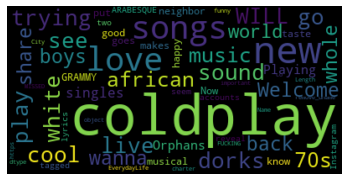

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
# Start with one review:
hasil = cp["remove_uname"]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(hasil))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
print("Document Count")
print((cp.groupby('username')['remove_uname']).count())
print("Word Count")
cp.groupby('username').apply(lambda x: x.remove_uname.apply(lambda x: len(x.split())).sum())

Document Count
username
01001010eni       1
0612_moon         1
09Seidy1D         1
0Be_Relax         1
0PATRICKSTARR0    1
                 ..
zymasri           3
zzZ3817VGB6       1
zzxrrc            1
zzzkath           1
zzzzzzyep         1
Name: remove_uname, Length: 7650, dtype: int64
Word Count


username
01001010eni        8
0612_moon         13
09Seidy1D         11
0Be_Relax         10
0PATRICKSTARR0    23
                  ..
zymasri           54
zzZ3817VGB6       21
zzxrrc            14
zzzkath            5
zzzzzzyep         17
Length: 7650, dtype: int64

In [ ]:
convention_df=cp[['username','remove_uname']].astype('str')
convention_df['parsed'] = convention_df.remove_uname.apply(nlp)
convention_df.head()

,username,remove_uname,parsed
0,dalethedragon_,WILL go see Coldplay live. I W I L L,"(WILL, go, see, Coldplay, live, ., I, W, I, L, L)"
1,EliBraden,new coldplay songs sound like white dorks trying to play cool african music from the 70s,"(new, coldplay, songs, sound, like, white, dorks, trying, to, play, cool, african, music, from, ..."
2,ladyastorstatue,": @coldplay Love, love, love! Welcome back boys @coldplay 🙌🏻💛","(:, @coldplay, Love, ,, love, ,, love, !, Welcome, back, boys, @coldplay, 🙌, 🏻, 💛)"
3,SaraShaabanAli,wanna share with the whole world coldplay's 2 new singles ❤️❤️❤️❤️,"(wanna, share, with, the, whole, world, coldplay, 's, 2, new, singles, ❤, ️, ❤, ️, ❤, ️, ❤, ️)"
4,BBCMcrMusicBot,Playing Coldplay - Orphans @coldplay,"(Playing, Coldplay, -, Orphans, @coldplay)"


In [ ]:
!pip install scattertext

     |████████████████████████████████| 6.7MB 7.6MB/s 


In [ ]:
%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("&lt;style>.container { width:98% !important; }&lt;/style>"))

In [ ]:
corpus = st.CorpusFromParsedDocuments(cp,category_col='username',parsed_col='parsed').build()

KeyError: ignored

In [ ]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [ ]:
cp['remove_uname'].sample(5)

3459                   : Coldplay are back and they are here to save 2019. \n\n🌙☀️ #EverydayLife vgOn324n0W
582     : Orphans &amp; Arabesque\ntwo tracks, out now\nEveryday Life\nthe new album, out Nov 22\nlisten...
4764                   : Coldplay are back and they are here to save 2019. \n\n🌙☀️ #EverydayLife vgOn324n0W
1854    : Orphans &amp; Arabesque\ntwo tracks, out now\nEveryday Life\nthe new album, out Nov 22\nlisten...
6589                              : Me and my squad on our way to the Coldplay concert next tour CqKQH1u6ZQ
Name: remove_uname, dtype: object

In [ ]:
get_entities("Me and my squad on our way to the Coldplay concert next tour")

['Me', 'Coldplay concert']

In [ ]:
entity_pairs = []

for i in tqdm(cp["remove_uname"]):
  entity_pairs.append(get_entities(i))


100%|██████████| 10000/10000 [01:49<00:00, 91.07it/s]

In [ ]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

In [ ]:
from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx



In [ ]:
get_relation("John completed the task")

'completed'

In [ ]:
relations = [get_relation(i) for i in tqdm(cp["remove_uname"])]






  0%|          | 0/10000 [00:00<?, ?it/s]




  0%|          | 10/10000 [00:00<01:49, 91.19it/s]




  0%|          | 20/10000 [00:00<01:48, 91.70it/s]




  0%|          | 30/10000 [00:00<01:47, 92.60it/s]




  0%|          | 40/10000 [00:00<01:47, 92.80it/s]

IndexError: ignored

In [ ]:
pd.Series(relations).value_counts()[:50]